## Question 1

In a factory, the weights of a product are normally distributed with a mean of 500 grams and a standard deviation of 10 grams.
 - Calculate the probability density function (PDF) at 490 grams and 510 grams. What do these values represent?
 - Use the cumulative distribution function (CDF) to find the probability that a randomly chosen product weighs less than 495 grams.
 - Calculate the CDF at 520 grams and interpret what this probability represents in this context.

## Solution 1

PDF at 490 grams: 0.02420
PDF at 510 grams: 0.02420
Probability that a randomly chosen product weighs less than 495 grams (CDF at 495): 0.30854
CDF at 520 grams: 0.97725


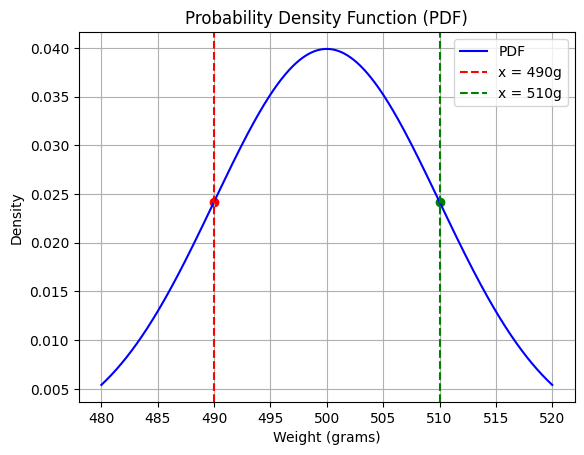

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters of the normal distribution
mean = 500
std_dev = 10

# Function to calculate Probability Density Function (PDF)
def calculate_pdf(x):
    return stats.norm.pdf(x, mean, std_dev)

# Calculate PDF at 490 grams and 510 grams
pdf_at_490 = calculate_pdf(490)
pdf_at_510 = calculate_pdf(510)

# Calculate CDF at 495 grams and 520 grams
cdf_at_495 = stats.norm.cdf(495, mean, std_dev)
cdf_at_520 = stats.norm.cdf(520, mean, std_dev)

# Output the results
print(f"PDF at 490 grams: {pdf_at_490:.5f}")
print(f"PDF at 510 grams: {pdf_at_510:.5f}")
print(f"Probability that a randomly chosen product weighs less than 495 grams (CDF at 495): {cdf_at_495:.5f}")
print(f"CDF at 520 grams: {cdf_at_520:.5f}")

# Plotting the PDF
x_values = np.linspace(480, 520, 1000)  # Zoomed in between 480g and 520g
pdf_values = calculate_pdf(x_values)

plt.plot(x_values, pdf_values, label='PDF', color='blue')

# Marking x = 490 grams
plt.axvline(x=490, color='red', linestyle='--', label='x = 490g')
plt.scatter(490, pdf_at_490, color='red')

# Marking x = 510 grams
plt.axvline(x=510, color='green', linestyle='--', label='x = 510g')
plt.scatter(510, pdf_at_510, color='green')

# Adding labels and grid
plt.title('Probability Density Function (PDF)')
plt.xlabel('Weight (grams)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


## Question 2

The height of adult men in a certain country follows a normal distribution with a mean of 175 cm and a standard deviation of 8 cm.
 - Calculate the probability that a randomly chosen man is taller than 180 cm.
 - Using the CDF, determine the probability that a randomly chosen man’s height lies between 165 cm and 185 cm.
 - Find the height at which the CDF is equal to 0.95 (i.e., the 95th percentile). What does this height mean in this context?

## Solution 2

Probability that a randomly chosen man is taller than 180 cm: 0.26599
Probability that a randomly chosen man's height lies between 165 cm and 185 cm: 0.78870
Height at the 95th percentile: 188.16 cm


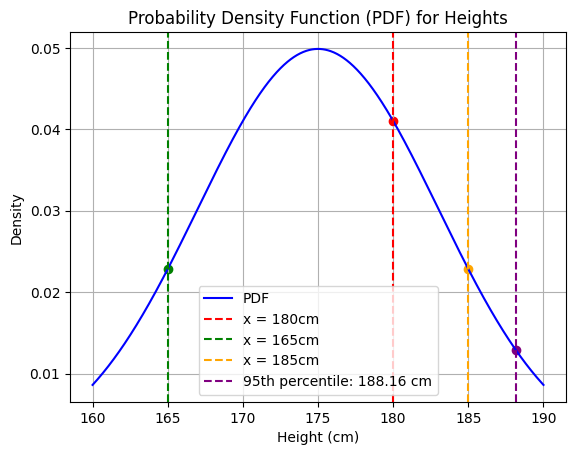

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean_height = 175
std_dev_height = 8

# Function to calculate the CDF at a given height
def calculate_cdf(x):
    return stats.norm.cdf(x, mean_height, std_dev_height)

# Function to calculate the height corresponding to a given percentile
def height_at_percentile(percentile):
    return stats.norm.ppf(percentile, mean_height, std_dev_height)

# Part 1: Probability that a randomly chosen man is taller than 180 cm
cdf_at_180 = calculate_cdf(180)
probability_taller_than_180 = 1 - cdf_at_180  # P(X > 180)

# Part 2: Probability that a randomly chosen man's height lies between 165 cm and 185 cm
cdf_at_165 = calculate_cdf(165)
cdf_at_185 = calculate_cdf(185)
probability_between_165_and_185 = cdf_at_185 - cdf_at_165

# Part 3: Find the height corresponding to the 95th percentile
height_95th_percentile = height_at_percentile(0.95)

# Displaying the results
print(f"Probability that a randomly chosen man is taller than 180 cm: {probability_taller_than_180:.5f}")
print(f"Probability that a randomly chosen man's height lies between 165 cm and 185 cm: {probability_between_165_and_185:.5f}")
print(f"Height at the 95th percentile: {height_95th_percentile:.2f} cm")

# Plot the PDF for heights
x_values = np.linspace(160, 190, 1000)
pdf_values = stats.norm.pdf(x_values, mean_height, std_dev_height)

plt.plot(x_values, pdf_values, label='PDF', color='blue')

# Highlight 180 cm
plt.axvline(x=180, color='red', linestyle='--', label='x = 180cm')
plt.scatter(180, stats.norm.pdf(180, mean_height, std_dev_height), color='red')

# Highlight 165 cm
plt.axvline(x=165, color='green', linestyle='--', label='x = 165cm')
plt.scatter(165, stats.norm.pdf(165, mean_height, std_dev_height), color='green')

# Highlight 185 cm
plt.axvline(x=185, color='orange', linestyle='--', label='x = 185cm')
plt.scatter(185, stats.norm.pdf(185, mean_height, std_dev_height), color='orange')

# Highlight the 95th percentile
plt.axvline(x=height_95th_percentile, color='purple', linestyle='--', label=f'95th percentile: {height_95th_percentile:.2f} cm')
plt.scatter(height_95th_percentile, stats.norm.pdf(height_95th_percentile, mean_height, std_dev_height), color='purple')

# Final plot settings
plt.title('Probability Density Function (PDF) for Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.show()


## Question 3

A call center receives an average of 10 calls per hour.
 - What is the probability that they receive exactly 8 calls in a given hour? (Use the PMF.)
 - What is the probability of receiving 15 or fewer calls in an hour? (Use the CDF.)
 - Determine the probability of receiving more than 20 calls in an hour.

## Solution 3

Probability of receiving exactly 8 calls: 0.11260
Probability of receiving 15 or fewer calls: 0.95126
Probability of receiving more than 20 calls: 0.00159


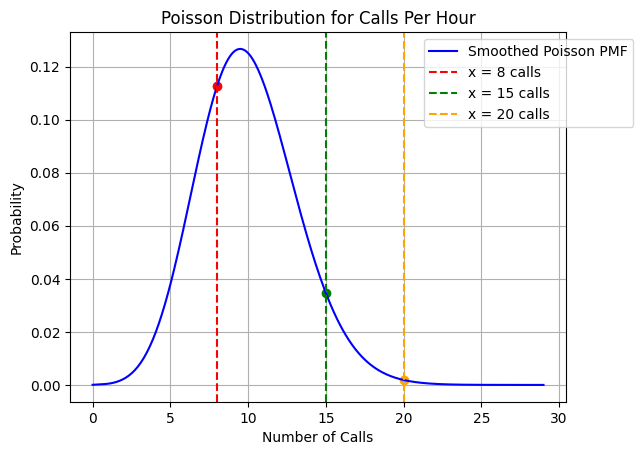

In [19]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Parameters for the Poisson distribution
lambda_calls = 10  # Average number of calls per hour

# Part 1: Probability of receiving exactly 8 calls (PMF)
def probability_exactly_n_calls(n):
    return stats.poisson.pmf(n, lambda_calls)

# Part 2: Probability of receiving 15 or fewer calls (CDF)
def probability_up_to_n_calls(n):
    return stats.poisson.cdf(n, lambda_calls)

# Part 3: Probability of receiving more than 20 calls
def probability_more_than_n_calls(n):
    return 1 - stats.poisson.cdf(n, lambda_calls)

# Calculations
probability_8_calls = probability_exactly_n_calls(8)
probability_15_or_fewer_calls = probability_up_to_n_calls(15)
probability_more_than_20_calls = probability_more_than_n_calls(20)

# Displaying the results
print(f"Probability of receiving exactly 8 calls: {probability_8_calls:.5f}")
print(f"Probability of receiving 15 or fewer calls: {probability_15_or_fewer_calls:.5f}")
print(f"Probability of receiving more than 20 calls: {probability_more_than_20_calls:.5f}")

# Plotting the Poisson distribution
x_values = np.arange(0, 30)  # Number of calls from 0 to 30
pmf_values = stats.poisson.pmf(x_values, lambda_calls)

# Smoothing the PMF curve for a rounded appearance
x_smooth = np.linspace(0, 29, 300)  # Smooth x values
pmf_smooth = make_interp_spline(x_values, pmf_values)(x_smooth)

plt.plot(x_smooth, pmf_smooth, label='Smoothed Poisson PMF', color='blue')

# Highlighting exactly 8 calls
plt.axvline(x=8, color='red', linestyle='--', label='x = 8 calls')
plt.scatter(8, stats.poisson.pmf(8, lambda_calls), color='red')

# Highlighting 15 or fewer calls
plt.axvline(x=15, color='green', linestyle='--', label='x = 15 calls')
plt.scatter(15, stats.poisson.pmf(15, lambda_calls), color='green')

# Highlighting more than 20 calls
plt.axvline(x=20, color='orange', linestyle='--', label='x = 20 calls')
plt.scatter(20, stats.poisson.pmf(20, lambda_calls), color='orange')

# Final plot settings
plt.title('Poisson Distribution for Calls Per Hour')
plt.xlabel('Number of Calls')
plt.ylabel('Probability')

# Adjust legend position using bbox_to_anchor to avoid overlapping
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(True)
plt.show()


## Question 4

In a certain town, accidents happen at a rate of 3 accidents per day on average.
 - What is the probability of observing exactly 5 accidents on a given day?
 - Calculate the probability of observing no more than 2 accidents on a given day.
 - If an accident occurs once every few hours, is this town’s accident rate more likely to follow a Poisson or Normal distribution? Explain your reasoning.

## Solution 4

Probability of observing exactly 5 accidents: 0.10082
Probability of observing no more than 2 accidents: 0.42319
In this case, the town’s accident rate is more likely to follow a Poisson distribution.


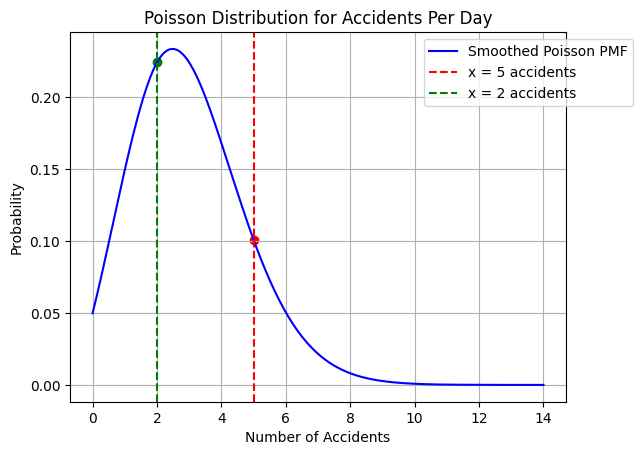

In [20]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Parameters for the Poisson distribution
lambda_accidents = 3  # Average number of accidents per day

# Calculate the probability of observing exactly n accidents using PMF
def probability_exactly_n_accidents(n):
    return stats.poisson.pmf(n, lambda_accidents)

# Calculate the cumulative probability of observing up to n accidents using CDF
def probability_up_to_n_accidents(n):
    return stats.poisson.cdf(n, lambda_accidents)

# Calculate the probabilities
probability_5_accidents = probability_exactly_n_accidents(5)
probability_no_more_than_2_accidents = probability_up_to_n_accidents(2)

# Output the results
print(f"Probability of observing exactly 5 accidents: {probability_5_accidents:.5f}")
print(f"Probability of observing no more than 2 accidents: {probability_no_more_than_2_accidents:.5f}")

# Determine the distribution type
if lambda_accidents < 10:
    distribution_type = "Poisson"
else:
    distribution_type = "Normal"

print(f"In this case, the town’s accident rate is more likely to follow a {distribution_type} distribution.")

# Plotting the Poisson distribution
x_values = np.arange(0, 15)  # Number of accidents from 0 to 14
pmf_values = stats.poisson.pmf(x_values, lambda_accidents)

# Smoothing the PMF curve for a rounded appearance
x_smooth = np.linspace(0, 14, 300)  # Smooth x values
pmf_smooth = make_interp_spline(x_values, pmf_values)(x_smooth)

plt.plot(x_smooth, pmf_smooth, label='Smoothed Poisson PMF', color='blue')

# Highlighting exactly 5 accidents
plt.axvline(x=5, color='red', linestyle='--', label='x = 5 accidents')
plt.scatter(5, stats.poisson.pmf(5, lambda_accidents), color='red')

# Highlighting no more than 2 accidents
plt.axvline(x=2, color='green', linestyle='--', label='x = 2 accidents')
plt.scatter(2, stats.poisson.pmf(2, lambda_accidents), color='green')

# Final plot settings
plt.title('Poisson Distribution for Accidents Per Day')
plt.xlabel('Number of Accidents')
plt.ylabel('Probability')

# Adjust legend position using bbox_to_anchor to avoid overlapping
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(True)
plt.show()


## Question 5

In a school cafeteria, students arrive randomly at a rate of 5 students per minute. The time between arrivals is known to follow an exponential distribution (a related form of the Poisson distribution).
 - What is the probability that exactly 3 students arrive in the next minute?
 - Using the CDF, calculate the probability that at least 10 students arrive within the next 2 minutes.
 - If the waiting times between arrivals are normally distributed with a mean of 12 seconds and a standard deviation of 5 seconds, what is the probability that the waiting time for the next student exceeds 20 seconds?

## Solution 5

Probability of exactly 3 students arriving in the next minute: 0.14037
Probability of at least 10 students arriving in the next 2 minutes: 0.54207
Probability that the waiting time for the next student exceeds 20 seconds: 0.05480


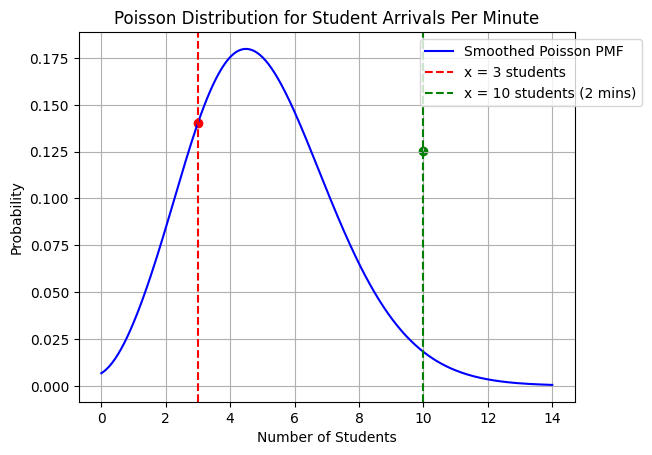

In [21]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Parameters for the Poisson distribution
lambda_students_per_minute = 5  # Average arrival rate (students per minute)

# Calculate the probability of observing exactly n students arriving in the next minute using PMF
def probability_exactly_n_students(n):
    return stats.poisson.pmf(n, lambda_students_per_minute)

# Calculate the probability of observing at least n students in a given duration using CDF
def probability_at_least_n_students(n, duration_minutes):
    lambda_students = lambda_students_per_minute * duration_minutes
    return 1 - stats.poisson.cdf(n - 1, lambda_students)  # Use 1 - CDF(n-1) for at least n

# Parameters for waiting time
mean_wait_time_seconds = 12  # Mean waiting time in seconds
std_dev_wait_time_seconds = 5  # Standard deviation of waiting time in seconds

# Calculate the probability that the waiting time exceeds a certain threshold
def probability_waiting_time_exceeds(threshold):
    return 1 - stats.norm.cdf(threshold, mean_wait_time_seconds, std_dev_wait_time_seconds)

# Calculate the probabilities
probability_3_students = probability_exactly_n_students(3)
probability_at_least_10_students_in_2_minutes = probability_at_least_n_students(10, 2)
probability_wait_time_exceeds_20_seconds = probability_waiting_time_exceeds(20)

# Output the results
print(f"Probability of exactly 3 students arriving in the next minute: {probability_3_students:.5f}")
print(f"Probability of at least 10 students arriving in the next 2 minutes: {probability_at_least_10_students_in_2_minutes:.5f}")
print(f"Probability that the waiting time for the next student exceeds 20 seconds: {probability_wait_time_exceeds_20_seconds:.5f}")

# Plotting the Poisson distribution for students arriving per minute
x_values = np.arange(0, 15)  # Number of students from 0 to 14
pmf_values = stats.poisson.pmf(x_values, lambda_students_per_minute)

# Smoothing the PMF curve for a rounded appearance
x_smooth = np.linspace(0, 14, 300)  # Smooth x values
pmf_smooth = make_interp_spline(x_values, pmf_values)(x_smooth)

plt.plot(x_smooth, pmf_smooth, label='Smoothed Poisson PMF', color='blue')

# Highlighting exactly 3 students
plt.axvline(x=3, color='red', linestyle='--', label='x = 3 students')
plt.scatter(3, stats.poisson.pmf(3, lambda_students_per_minute), color='red')

# Highlighting at least 10 students in 2 minutes
plt.axvline(x=10, color='green', linestyle='--', label='x = 10 students (2 mins)')
plt.scatter(10, stats.poisson.pmf(10, lambda_students_per_minute * 2), color='green')

# Final plot settings
plt.title('Poisson Distribution for Student Arrivals Per Minute')
plt.xlabel('Number of Students')
plt.ylabel('Probability')

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()


## Question 6

You are analyzing customer purchase amounts at an e-commerce store and find that these amounts roughly follow a normal distribution with a mean of $75 and a standard deviation of $15.
 - Find the probability that a randomly selected customer spends more than $100.
 - Calculate the probability that a customer spends between $60 and $90.
 - Assume that the store receives 20 purchases per hour on average. What is the probability of receiving more than 25 purchases in an hour?

## Solution 6

Probability that a customer spends more than $100: 0.04779
Probability that a customer spends between $60 and $90: 0.68269
Probability of receiving more than 25 purchases in an hour: 0.11218


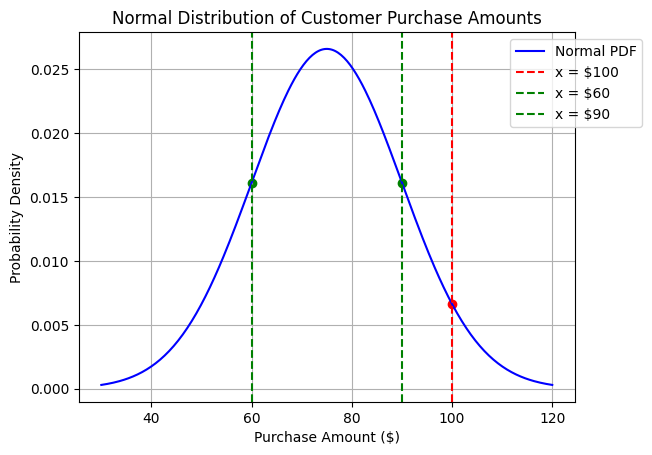

In [22]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Parameters for the normal distribution of customer purchase amounts
mean_purchase_amount = 75  # Mean purchase amount in dollars
std_dev_purchase_amount = 15  # Standard deviation of purchase amounts in dollars

# Calculate the probability that a randomly selected customer spends more than a given amount
def probability_spending_more_than(amount):
    return 1 - stats.norm.cdf(amount, mean_purchase_amount, std_dev_purchase_amount)

# Calculate the probability that a customer spends between two amounts
def probability_spending_between(lower_bound, upper_bound):
    return stats.norm.cdf(upper_bound, mean_purchase_amount, std_dev_purchase_amount) - \
           stats.norm.cdf(lower_bound, mean_purchase_amount, std_dev_purchase_amount)

# Parameters for the Poisson distribution of purchase counts
lambda_purchases_per_hour = 20  # Average number of purchases per hour

def probability_more_than_n_purchases(n):
    return 1 - stats.poisson.cdf(n, lambda_purchases_per_hour)

# Calculate the probabilities
probability_spending_more_than_100 = probability_spending_more_than(100)
probability_spending_between_60_and_90 = probability_spending_between(60, 90)
probability_more_than_25_purchases = probability_more_than_n_purchases(25)

# Output the results
print(f"Probability that a customer spends more than $100: {probability_spending_more_than_100:.5f}")
print(f"Probability that a customer spends between $60 and $90: {probability_spending_between_60_and_90:.5f}")
print(f"Probability of receiving more than 25 purchases in an hour: {probability_more_than_25_purchases:.5f}")

# Plotting the normal distribution of customer purchase amounts
x_values = np.linspace(30, 120, 300)  # Range of purchase amounts
pdf_values = stats.norm.pdf(x_values, mean_purchase_amount, std_dev_purchase_amount)

# Smoothing the PDF curve for a rounded appearance
pdf_smooth = make_interp_spline(x_values, pdf_values)(x_values)

plt.plot(x_values, pdf_smooth, label='Normal PDF', color='blue')

# Highlighting spending more than $100
plt.axvline(x=100, color='red', linestyle='--', label='x = $100')
plt.scatter(100, stats.norm.pdf(100, mean_purchase_amount, std_dev_purchase_amount), color='red')

# Highlighting spending between $60 and $90
plt.axvline(x=60, color='green', linestyle='--', label='x = $60')
plt.axvline(x=90, color='green', linestyle='--', label='x = $90')
plt.scatter(60, stats.norm.pdf(60, mean_purchase_amount, std_dev_purchase_amount), color='green')
plt.scatter(90, stats.norm.pdf(90, mean_purchase_amount, std_dev_purchase_amount), color='green')

# Final plot settings
plt.title('Normal Distribution of Customer Purchase Amounts')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Probability Density')

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()
